In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline
plt.style.use('ggplot')

In [28]:

schema = ['uid','device','date','churn']
df = pd.read_csv('/Users/zhangtianqi/desktop/music_box_project/data/train_data_play.log',
                 delimiter='\t',header=None,index_col=None,names=schema)

In [3]:
df_down = pd.read_csv('/Users/zhangtianqi/desktop/music_box_project/data/train_data_down.log',
                 delimiter='\t',header=None,index_col=None,names=schema)
df_search = pd.read_csv('/Users/zhangtianqi/desktop/music_box_project/data/train_data_search.log',
                 delimiter='\t',header=None,index_col=None,names=schema)

In [4]:
df.head()

,uid,device,date,churn
0,168551248,ip,20170330,1
1,168551331,ar,20170330,0
2,168539760,ar,20170330,1
3,168544926,ar,20170330,1
4,168532580,ar,20170330,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25390415 entries, 0 to 25390414
Data columns (total 4 columns):
uid       int64
device    object
date      int64
churn     int64
dtypes: int64(3), object(1)
memory usage: 774.9+ MB


In [29]:
df = df[-df['uid'].isnull()]

In [30]:
df = df[-df['churn'].isnull()]

In [31]:
df = df[df['churn'] <= 1]

In [39]:
df

,uid,device,churn
0,36816,ar,1
1,126721,ar,0
2,150921,ar,1
3,250691,ar,1
4,269510,ar,0
5,305847,ar,1
6,312940,ar,0
7,380741,ar,1
8,497685,ar,0
9,501982,ar,1


In [33]:
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')

In [11]:
df_down['date'] = pd.to_datetime(df_down['date'],format='%Y%m%d')
df_search['date'] = pd.to_datetime(df_search['date'],format='%Y%m%d')

In [36]:
df = df.set_index('date')

In [13]:
df_down = df_down.set_index('date')
df_search = df_search.set_index('date')

## Create features

In [37]:
df_1d = df.ix['2017-04-20' : '2017-04-21']
df_3d = df.ix['2017-04-18' : '2017-04-21']
df_7d = df.ix['2017-04-14' : '2017-04-21']
df_14d = df.ix['2017-04-07' : '2017-04-21']
df_22d = df.ix['2017-03-30' : '2017-04-21']

/Users/zhangtianqi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [15]:
df_down_1d = df_down.ix['2017-04-20' : '2017-04-21']
df_down_3d = df_down.ix['2017-04-18' : '2017-04-21']
df_down_7d = df_down.ix['2017-04-14' : '2017-04-21']
df_down_14d = df_down.ix['2017-04-07' : '2017-04-21']
df_down_22d = df_down.ix['2017-03-30' : '2017-04-21']
df_search_1d = df_search.ix['2017-04-20' : '2017-04-21']
df_search_3d = df_search.ix['2017-04-18' : '2017-04-21']
df_search_7d = df_search.ix['2017-04-14' : '2017-04-21']
df_search_14d = df_search.ix['2017-04-07' : '2017-04-21']
df_search_22d = df_search.ix['2017-03-30' : '2017-04-21']

/Users/zhangtianqi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.
/Users/zhangtianqi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [38]:
df = df.groupby(['uid','device','churn']).count()
df = df.reset_index()

In [17]:
df_down = df_down.groupby(['uid','device','churn']).count()
df_down = df_down.reset_index()
df_search = df_search.groupby(['uid','device','churn']).count()
df_search = df_search.reset_index()

In [49]:
def count_by_window(df_,df_x,feat_name):
    df_count = df_x[['uid','device']].groupby('uid').count().rename(columns={'device':feat_name})
    return df_.merge(df_count, how='left',left_on ='uid',right_index = True)


In [42]:
df = count_by_window(df,df_1d,'play_1d_count')
df = count_by_window(df,df_3d,'play_3d_count')
df = count_by_window(df,df_7d,'play_7d_count')
df = count_by_window(df,df_14d,'play_14d_count')
df = count_by_window(df,df_22d,'play_22d_count')

In [45]:
df = df.fillna(0)

In [46]:
def exclude_outliers(df_ , feature_name , days):
    return df_[df_[feature_name]<=500*(days+1)]
df = exclude_outliers(df ,'play_1d_count' , 1 )
df = exclude_outliers(df ,'play_3d_count' , 3 )
df = exclude_outliers(df ,'play_7d_count' , 7 )
df = exclude_outliers(df ,'play_14d_count' , 14 )
df = exclude_outliers(df ,'play_22d_count' , 22 )

In [50]:
df = count_by_window(df,df_down_1d,'down_1d_count')
df = count_by_window(df,df_down_3d,'down_3d_count')
df = count_by_window(df,df_down_7d,'down_7d_count')
df = count_by_window(df,df_down_14d,'down_14d_count')
df = count_by_window(df,df_down_22d,'down_22d_count')
df = count_by_window(df,df_search_1d,'search_1d_count')
df = count_by_window(df,df_search_3d,'search_3d_count')
df = count_by_window(df,df_search_7d,'search_7d_count')
df = count_by_window(df,df_search_14d,'search_14d_count')
df = count_by_window(df,df_search_22d,'search_22d_count')

In [53]:
df = df.fillna(0)

In [121]:
df['play_1d_ov_7d'] = df['play_1d_count'] / (df['play_7d_count'] + 0.00001)

In [208]:
df['play_1d_ov_3d'] = df['play_1d_count'] / (df['play_3d_count'] + 0.00001)

In [209]:
df['play_1d_ov_14d'] = df['play_1d_count'] / (df['play_14d_count'] + 0.00001)

In [210]:
df['play_1d_ov_22d'] = df['play_1d_count'] / (df['play_22d_count'] + 0.00001)

In [122]:
df['play_3d_ov_14d'] = df['play_3d_count'] / (df['play_14d_count'] + 0.00001)

In [211]:
df['play_3d_ov_7d'] = df['play_3d_count'] / (df['play_7d_count'] + 0.00001)

In [212]:
df['play_3d_ov_22d'] = df['play_3d_count'] / (df['play_22d_count'] + 0.00001)

In [213]:
df['play_7d_ov_14d'] = df['play_7d_count'] / (df['play_14d_count'] + 0.00001)

In [214]:
df['play_7d_ov_22d'] = df['play_7d_count'] / (df['play_22d_count'] + 0.00001)

In [215]:
df['play_14d_ov_22d'] = df['play_14d_count'] / (df['play_22d_count'] + 0.00001)

In [123]:
df['play_22d_ov_search_22d'] = df['play_22d_count'] / (df['search_22d_count'] + 0.00001)

In [237]:
df['play_1d_ov_search_1d'] = df['play_1d_count'] / (df['search_1d_count'] + 0.00001)

In [238]:
df['play_1d_ov_search_3d'] = df['play_1d_count'] / (df['search_3d_count'] + 0.00001)

In [239]:
df['play_1d_ov_search_14d'] = df['play_1d_count'] / (df['search_14d_count'] + 0.00001)

In [240]:
df['play_1d_ov_search_22d'] = df['play_1d_count'] / (df['search_22d_count'] + 0.00001)

In [241]:
df['play_3d_ov_search_3d'] = df['play_3d_count'] / (df['search_3d_count'] + 0.00001)
df['play_3d_ov_search_14d'] = df['play_3d_count'] / (df['search_14d_count'] + 0.00001)
df['play_3d_ov_search_7d'] = df['play_3d_count'] / (df['search_7d_count'] + 0.00001)
df['play_3d_ov_search_22d'] = df['play_3d_count'] / (df['search_22d_count'] + 0.00001)

In [242]:
df['play_7d_ov_search_14d'] = df['play_7d_count'] / (df['search_14d_count'] + 0.00001)
df['play_7d_ov_search_7d'] = df['play_7d_count'] / (df['search_7d_count'] + 0.00001)
df['play_7d_ov_search_22d'] = df['play_7d_count'] / (df['search_22d_count'] + 0.00001)

In [243]:
df['play_14d_ov_search_14d'] = df['play_14d_count'] / (df['search_14d_count'] + 0.00001)
df['play_14d_ov_search_22d'] = df['play_14d_count'] / (df['search_22d_count'] + 0.00001)

In [244]:
df['play_1d_ov_down_1d'] = df['play_1d_count'] / (df['down_1d_count'] + 0.00001)
df['play_1d_ov_down_3d'] = df['play_1d_count'] / (df['down_3d_count'] + 0.00001)
df['play_1d_ov_down_14d'] = df['play_1d_count'] / (df['down_14d_count'] + 0.00001)
df['play_1d_ov_down_22d'] = df['play_1d_count'] / (df['down_22d_count'] + 0.00001)

In [245]:
df['play_3d_ov_down_3d'] = df['play_3d_count'] / (df['down_3d_count'] + 0.00001)
df['play_3d_ov_down_7d'] = df['play_3d_count'] / (df['down_7d_count'] + 0.00001)
df['play_3d_ov_down_14d'] = df['play_3d_count'] / (df['down_14d_count'] + 0.00001)
df['play_3d_ov_down_22d'] = df['play_3d_count'] / (df['down_22d_count'] + 0.00001)

In [246]:
df['play_7d_ov_down_7d'] = df['play_7d_count'] / (df['down_7d_count'] + 0.00001)
df['play_7d_ov_down_14d'] = df['play_7d_count'] / (df['down_14d_count'] + 0.00001)
df['play_7d_ov_down_22d'] = df['play_7d_count'] / (df['down_22d_count'] + 0.00001)

In [247]:
df['play_14d_ov_down_14d'] = df['play_14d_count'] / (df['down_14d_count'] + 0.00001)
df['play_14d_ov_down_22d'] = df['play_14d_count'] / (df['down_22d_count'] + 0.00001)

In [248]:
df['play_22d_ov_down_22d'] = df['play_22d_count'] / (df['down_22d_count'] + 0.00001)

In [251]:
df['search_1d_ov_down_1d'] = df['search_1d_count'] / (df['down_1d_count'] + 0.00001)
df['search_1d_ov_down_3d'] = df['search_1d_count'] / (df['down_3d_count'] + 0.00001)
df['search_1d_ov_down_7d'] = df['search_1d_count'] / (df['down_7d_count'] + 0.00001)
df['search_1d_ov_down_14d'] = df['search_1d_count'] / (df['down_14d_count'] + 0.00001)
df['search_1d_ov_down_22d'] = df['search_1d_count'] / (df['down_22d_count'] + 0.00001)

In [252]:
df['search_3d_ov_down_3d'] = df['search_3d_count'] / (df['down_3d_count'] + 0.00001)
df['search_3d_ov_down_7d'] = df['search_3d_count'] / (df['down_7d_count'] + 0.00001)
df['search_3d_ov_down_14d'] = df['search_3d_count'] / (df['down_14d_count'] + 0.00001)
df['search_3d_ov_down_22d'] = df['search_3d_count'] / (df['down_22d_count'] + 0.00001)

In [253]:
df['search_7d_ov_down_7d'] = df['search_7d_count'] / (df['down_7d_count'] + 0.00001)
df['search_7d_ov_down_14d'] = df['search_7d_count'] / (df['down_14d_count'] + 0.00001)
df['search_7d_ov_down_22d'] = df['search_7d_count'] / (df['down_22d_count'] + 0.00001)

In [254]:
df['search_14d_ov_down_14d'] = df['search_14d_count'] / (df['down_14d_count'] + 0.00001)
df['search_14d_ov_down_22d'] = df['search_14d_count'] / (df['down_22d_count'] + 0.00001)

In [255]:
df['search_22d_ov_down_22d'] = df['search_22d_count'] / (df['down_22d_count'] + 0.00001)

In [124]:
df['play_1d_ov_search_7d'] = df['play_1d_count'] / (df['search_7d_count'] + 0.00001)

In [125]:
df['play_1d_ov_down_7d'] = df['play_1d_count'] / (df['down_7d_count'] + 0.00001)

In [258]:
df['down_1d_ov_3d'] = df['down_1d_count'] / (df['down_3d_count'] + 0.00001)
df['down_1d_ov_7d'] = df['down_1d_count'] / (df['down_7d_count'] + 0.00001)
df['down_1d_ov_14d'] = df['down_1d_count'] / (df['down_14d_count'] + 0.00001)
df['down_1d_ov_22d'] = df['down_1d_count'] / (df['down_22d_count'] + 0.00001)

df['down_3d_ov_7d'] = df['down_3d_count'] / (df['down_7d_count'] + 0.00001)
df['down_3d_ov_14d'] = df['down_3d_count'] / (df['down_14d_count'] + 0.00001)
df['down_3d_ov_22d'] = df['down_3d_count'] / (df['down_22d_count'] + 0.00001)

df['down_7d_ov_14d'] = df['down_7d_count'] / (df['down_14d_count'] + 0.00001)
df['down_7d_ov_22d'] = df['down_7d_count'] / (df['down_22d_count'] + 0.00001)

df['down_14d_ov_22d'] = df['down_14d_count'] / (df['down_22d_count'] + 0.00001)

In [260]:
df['search_1d_ov_3d'] = df['search_1d_count'] / (df['search_3d_count'] + 0.00001)
df['search_1d_ov_7d'] = df['search_1d_count'] / (df['search_7d_count'] + 0.00001)
df['search_1d_ov_14d'] = df['search_1d_count'] / (df['search_14d_count'] + 0.00001)
df['search_1d_ov_22d'] = df['search_1d_count'] / (df['search_22d_count'] + 0.00001)

df['search_3d_ov_7d'] = df['search_3d_count'] / (df['search_7d_count'] + 0.00001)
df['search_3d_ov_14d'] = df['search_3d_count'] / (df['search_14d_count'] + 0.00001)
df['search_3d_ov_22d'] = df['search_3d_count'] / (df['search_22d_count'] + 0.00001)

df['search_7d_ov_14d'] = df['search_7d_count'] / (df['search_14d_count'] + 0.00001)
df['search_7d_ov_22d'] = df['search_7d_count'] / (df['search_22d_count'] + 0.00001)

df['search_14d_ov_22d'] = df['search_14d_count'] / (df['search_22d_count'] + 0.00001)

In [261]:
df.isnull().any()

uid                       False
device                    False
churn                     False
play_1d_count             False
play_3d_count             False
play_7d_count             False
play_14d_count            False
play_22d_count            False
down_1d_count             False
down_3d_count             False
down_7d_count             False
down_14d_count            False
down_22d_count            False
search_1d_count           False
search_3d_count           False
search_7d_count           False
search_14d_count          False
search_22d_count          False
play_1d_ov_7d             False
play_3d_ov_14d            False
play_22d_ov_search_22d    False
play_1d_ov_search_7d      False
play_1d_ov_down_7d        False
ar                        False
ip                        False
mc                        False
wp                        False
play_1d_ov_3d             False
play_1d_ov_14d            False
play_1d_ov_22d            False
                          ...  
search_3

In [63]:
df_dummies = pd.get_dummies(df['device'])


In [64]:
df = pd.concat([df, df_dummies], axis=1)


In [262]:
df.head(5)

,uid,device,churn,play_1d_count,play_3d_count,play_7d_count,play_14d_count,play_22d_count,down_1d_count,down_3d_count,...,search_1d_ov_3d,search_1d_ov_7d,search_1d_ov_14d,search_1d_ov_22d,search_3d_ov_7d,search_3d_ov_14d,search_3d_ov_22d,search_7d_ov_14d,search_7d_ov_22d,search_14d_ov_22d
0,36816,ar,1,0.0,0.0,0.0,0.0,4,0.0,0.0,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
1,126721,ar,0,140.0,346.0,709.0,886.0,941,0.0,0.0,...,0.999997,0.375,0.078947,0.078947,0.375,0.078947,0.078947,0.210526,0.210526,1.000000
2,150921,ar,1,0.0,0.0,0.0,0.0,46,0.0,0.0,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
3,250691,ar,1,0.0,0.0,0.0,0.0,28,0.0,0.0,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
4,269510,ar,0,0.0,0.0,0.0,0.0,14,0.0,0.0,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.499998


In [66]:
df['churn'].value_counts()

1    121121
0     89401
Name: churn, dtype: int64

## Build models

In [284]:
selected_features = df.columns[3:]

In [285]:
X = df[selected_features].values
y = df['churn'].values


In [287]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

In [328]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [364]:
param_lr = {
 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
 'penalty':['l1','l2']
}
gsearch_lr = GridSearchCV(estimator = LogisticRegression(random_state = 77), 
 param_grid = param_lr, scoring='roc_auc',iid=False, cv=5)
gsearch_lr.fit(X_train, y_train)
gsearch_lr.grid_scores_, gsearch_lr.best_params_, gsearch_lr.best_score_

([mean: 0.74323, std: 0.00158, params: {'penalty': 'l1', 'C': 0.001},
  mean: 0.70133, std: 0.00221, params: {'penalty': 'l2', 'C': 0.001},
  mean: 0.74756, std: 0.00234, params: {'penalty': 'l1', 'C': 0.01},
  mean: 0.70134, std: 0.00234, params: {'penalty': 'l2', 'C': 0.01},
  mean: 0.74868, std: 0.00237, params: {'penalty': 'l1', 'C': 0.1},
  mean: 0.70132, std: 0.00226, params: {'penalty': 'l2', 'C': 0.1},
  mean: 0.74871, std: 0.00237, params: {'penalty': 'l1', 'C': 1},
  mean: 0.70127, std: 0.00225, params: {'penalty': 'l2', 'C': 1},
  mean: 0.74872, std: 0.00236, params: {'penalty': 'l1', 'C': 10},
  mean: 0.70129, std: 0.00224, params: {'penalty': 'l2', 'C': 10},
  mean: 0.74872, std: 0.00236, params: {'penalty': 'l1', 'C': 100},
  mean: 0.70131, std: 0.00225, params: {'penalty': 'l2', 'C': 100},
  mean: 0.74872, std: 0.00236, params: {'penalty': 'l1', 'C': 1000},
  mean: 0.70128, std: 0.00228, params: {'penalty': 'l2', 'C': 1000}],
 {'C': 10, 'penalty': 'l1'},
 0.7487246206199

In [365]:
lr = LogisticRegression(C=10, penalty='l1')
lr.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [366]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [367]:
df_coeffs = pd.DataFrame(zip(selected_features, lr.coef_.flatten())).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
23,wp,2.802736e+00
15,play_1d_ov_7d,2.248645e+00
22,mc,2.200653e+00
16,play_3d_ov_14d,1.915231e+00
30,play_7d_ov_22d,8.073407e-01
92,search_7d_ov_22d,7.346504e-01
82,down_7d_ov_22d,7.235106e-01
89,search_3d_ov_14d,6.295232e-01
85,search_1d_ov_7d,6.148224e-01
76,down_1d_ov_14d,5.019400e-01


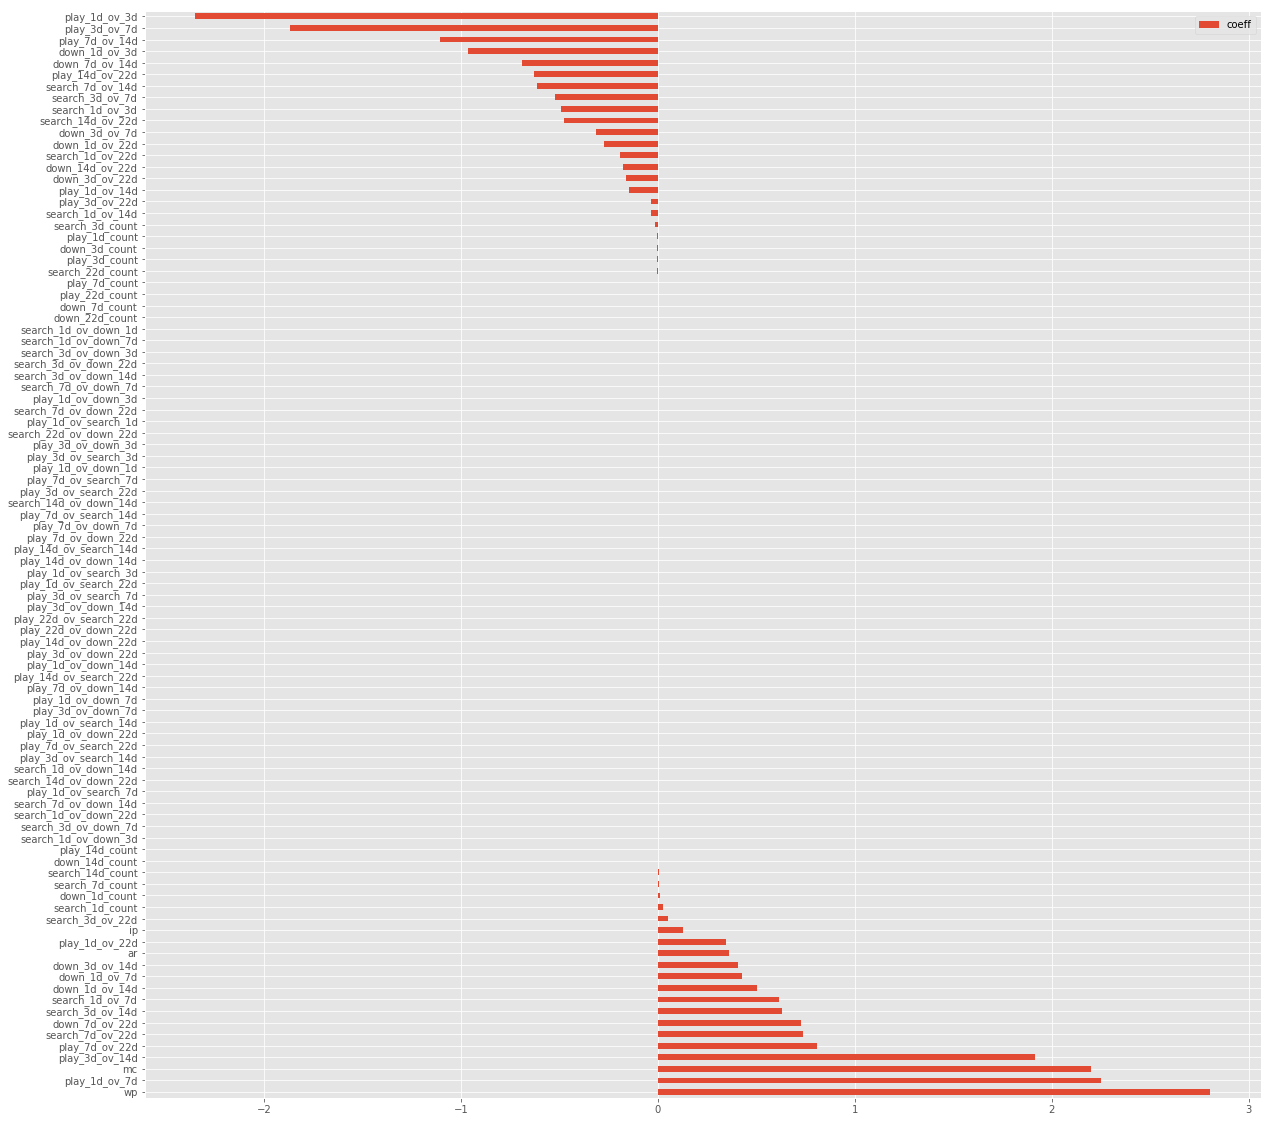

In [368]:
ax = df_coeffs.plot.barh(figsize=(20, 20))
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()


In [310]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
def print_results(y_true, y_pred):
    print("Accuracy is: {}".format(accuracy_score(y_true, y_pred)))
    print("Precision is: {}".format(precision_score(y_true, y_pred)))
    print("Recall is: {}".format(recall_score(y_true, y_pred)))
    print("f1-score is: {}".format(f1_score(y_true, y_pred)))
    print("Area Under Curve (AUC) is: {}".format(roc_auc_score(y_true, y_pred)))

In [369]:
print("Training set scores:")
print_results(y_train, y_train_pred)

Training set scores:
Accuracy is: 0.719879211482
Precision is: 0.707469984969
Recall is: 0.875954108556
f1-score is: 0.782748276407
Area Under Curve (AUC) is: 0.691862981698


In [372]:
print("Test set scores:")
print_results(y_test, y_test_pred)

Test set scores:
Accuracy is: 0.716864322245
Precision is: 0.703670804557
Recall is: 0.874727398206
f1-score is: 0.77993009747
Area Under Curve (AUC) is: 0.689628662715


In [77]:
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       0.79      0.41      0.54     62469
          1       0.68      0.92      0.78     84896

avg / total       0.73      0.70      0.68    147365



### Random Forest

In [343]:
from sklearn.ensemble import RandomForestClassifier

param_rf = {
 'criterion':['gini','entropy'],
 'max_features':['auto','log2',0.2,None,0.25,0.3],
 'min_samples_leaf':[40,50,60,70,80]
}
gsearch_rf = GridSearchCV(estimator = RandomForestClassifier(n_jobs=-1, random_state = 42), 
 param_grid = param_rf, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch_rf.fit(X_train, y_train)
gsearch_rf.grid_scores_, gsearch_rf.best_params_, gsearch_rf.best_score_

([mean: 0.75788, std: 0.00266, params: {'max_features': 'auto', 'criterion': 'gini', 'min_samples_leaf': 40},
  mean: 0.75765, std: 0.00300, params: {'max_features': 'auto', 'criterion': 'gini', 'min_samples_leaf': 50},
  mean: 0.75755, std: 0.00252, params: {'max_features': 'auto', 'criterion': 'gini', 'min_samples_leaf': 60},
  mean: 0.75765, std: 0.00249, params: {'max_features': 'auto', 'criterion': 'gini', 'min_samples_leaf': 70},
  mean: 0.75763, std: 0.00289, params: {'max_features': 'auto', 'criterion': 'gini', 'min_samples_leaf': 80},
  mean: 0.75656, std: 0.00181, params: {'max_features': 'log2', 'criterion': 'gini', 'min_samples_leaf': 40},
  mean: 0.75557, std: 0.00222, params: {'max_features': 'log2', 'criterion': 'gini', 'min_samples_leaf': 50},
  mean: 0.75599, std: 0.00255, params: {'max_features': 'log2', 'criterion': 'gini', 'min_samples_leaf': 60},
  mean: 0.75575, std: 0.00230, params: {'max_features': 'log2', 'criterion': 'gini', 'min_samples_leaf': 70},
  mean: 0.

In [344]:
param_rf2 = {
 'min_samples_leaf':range(80,150,10)
}
gsearch_rf2 = GridSearchCV(estimator = RandomForestClassifier(criterion='entropy',random_state = 42,max_features=0.2), 
 param_grid = param_rf2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch_rf2.fit(X_train, y_train)
gsearch_rf2.grid_scores_, gsearch_rf2.best_params_, gsearch_rf2.best_score_

([mean: 0.75826, std: 0.00263, params: {'min_samples_leaf': 80},
  mean: 0.75818, std: 0.00280, params: {'min_samples_leaf': 90},
  mean: 0.75819, std: 0.00301, params: {'min_samples_leaf': 100},
  mean: 0.75807, std: 0.00256, params: {'min_samples_leaf': 110},
  mean: 0.75826, std: 0.00257, params: {'min_samples_leaf': 120},
  mean: 0.75814, std: 0.00267, params: {'min_samples_leaf': 130},
  mean: 0.75817, std: 0.00250, params: {'min_samples_leaf': 140}],
 {'min_samples_leaf': 120},
 0.758262291681499)

In [345]:
param_rf3 = {
 'min_samples_leaf':range(112,130,2)
}
gsearch_rf3 = GridSearchCV(estimator = RandomForestClassifier(criterion='entropy',random_state = 42,max_features=0.2), 
 param_grid = param_rf3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch_rf3.fit(X_train, y_train)
gsearch_rf3.grid_scores_, gsearch_rf3.best_params_, gsearch_rf3.best_score_

([mean: 0.75823, std: 0.00270, params: {'min_samples_leaf': 112},
  mean: 0.75820, std: 0.00276, params: {'min_samples_leaf': 114},
  mean: 0.75816, std: 0.00268, params: {'min_samples_leaf': 116},
  mean: 0.75831, std: 0.00268, params: {'min_samples_leaf': 118},
  mean: 0.75826, std: 0.00257, params: {'min_samples_leaf': 120},
  mean: 0.75802, std: 0.00260, params: {'min_samples_leaf': 122},
  mean: 0.75809, std: 0.00263, params: {'min_samples_leaf': 124},
  mean: 0.75819, std: 0.00240, params: {'min_samples_leaf': 126},
  mean: 0.75823, std: 0.00277, params: {'min_samples_leaf': 128}],
 {'min_samples_leaf': 118},
 0.7583083948945146)

In [346]:
param_rf4 = {
 'min_samples_leaf':[117,118,119]
}
gsearch_rf4 = GridSearchCV(estimator = RandomForestClassifier(criterion='entropy',random_state = 42,max_features=0.2), 
 param_grid = param_rf4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch_rf4.fit(X_train, y_train)
gsearch_rf4.grid_scores_, gsearch_rf4.best_params_, gsearch_rf4.best_score_

([mean: 0.75829, std: 0.00285, params: {'min_samples_leaf': 117},
  mean: 0.75831, std: 0.00268, params: {'min_samples_leaf': 118},
  mean: 0.75825, std: 0.00268, params: {'min_samples_leaf': 119}],
 {'min_samples_leaf': 118},
 0.7583083948945146)

In [356]:
param_rf5 = {
 'n_estimators':[150,200,250]
}
gsearch_rf5 = GridSearchCV(estimator = RandomForestClassifier(criterion='entropy',random_state = 42,max_features=0.2,
   min_samples_leaf=118), param_grid = param_rf5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch_rf5.fit(X_train, y_train)
gsearch_rf5.grid_scores_, gsearch_rf5.best_params_, gsearch_rf5.best_score_

([mean: 0.75907, std: 0.00271, params: {'n_estimators': 150},
  mean: 0.75905, std: 0.00268, params: {'n_estimators': 200},
  mean: 0.75905, std: 0.00267, params: {'n_estimators': 250}],
 {'n_estimators': 150},
 0.759073183456082)

In [357]:
rf = RandomForestClassifier(criterion='entropy',random_state = 42,max_features=0.2, 
                            min_samples_leaf=118,n_estimators=150)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=0.2, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=118,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [358]:
rf_y_train_pred = rf.predict(X_train)
rf_y_test_pred = rf.predict(X_test)

In [359]:
df_imp = pd.DataFrame(zip(selected_features, rf.feature_importances_)).sort_values(by=[1], ascending=False)
df_imp.columns = ['feature', 'importance']
df_imp

,feature,importance
36,play_3d_ov_search_3d,0.142323
52,play_3d_ov_down_22d,0.082898
51,play_3d_ov_down_14d,0.082223
16,play_3d_ov_14d,0.064261
28,play_3d_ov_22d,0.061963
50,play_3d_ov_down_7d,0.060483
37,play_3d_ov_search_14d,0.039808
49,play_3d_ov_down_3d,0.030279
39,play_3d_ov_search_22d,0.028084
29,play_7d_ov_14d,0.028075


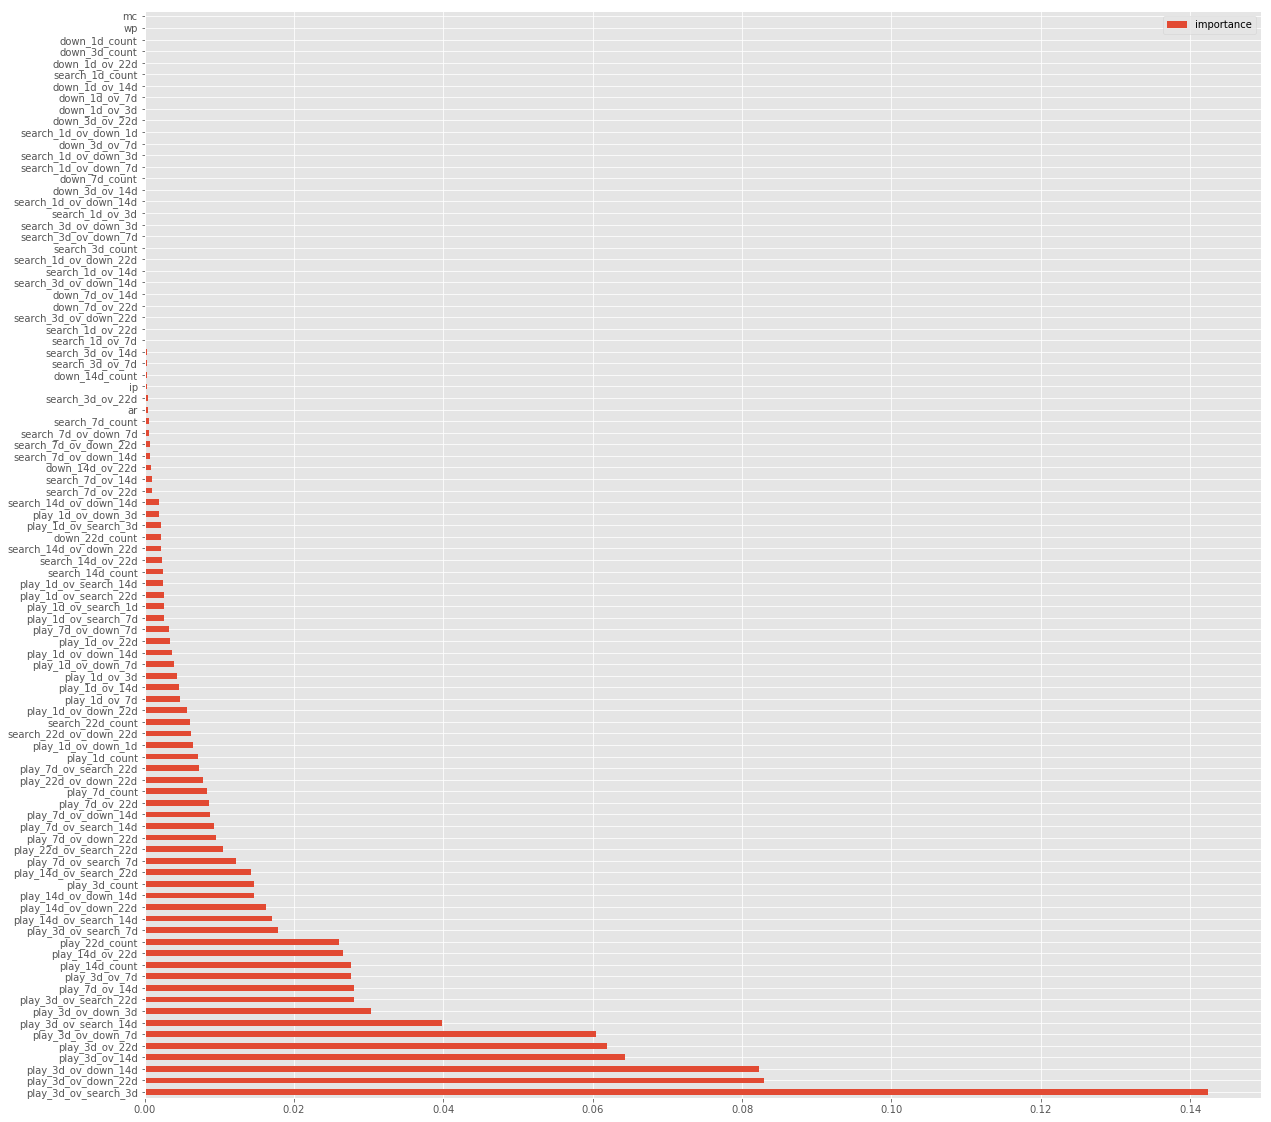

In [361]:
ax = df_imp.plot.barh(figsize=(20, 20))
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_imp['feature'])
plt.show()

In [362]:
print("Training set scores:")
print_results(y_train, rf_y_train_pred)

Training set scores:
Accuracy is: 0.735032063244
Precision is: 0.720586961751
Recall is: 0.882102808142
f1-score is: 0.793206264134
Area Under Curve (AUC) is: 0.708632124108


In [363]:
print("Test set scores:")
print_results(y_test, rf_y_test_pred)

Test set scores:
Accuracy is: 0.727520306538
Precision is: 0.714115209656
Recall is: 0.875389924086
f1-score is: 0.786570921854
Area Under Curve (AUC) is: 0.70200878946


### Xgboost

In [381]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 12

In [313]:
dtrain = pd.DataFrame(X_train)
dtrain.columns = selected_features
dtrain_target = pd.DataFrame(y_train)
dtrain_target.columns = ['churn']
dtrain = pd.concat([dtrain, dtrain_target], axis=1)
dtest = pd.DataFrame(X_test)
dtest.columns = selected_features
dtest_target = pd.DataFrame(y_test)
dtest_target.columns = ['churn']
dtest = pd.concat([dtest, dtest_target], axis=1)



In [314]:
def modelfit(alg, dtrain, dtest, selected_features, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[selected_features].values, label=dtrain['churn'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval = True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[selected_features], dtrain['churn'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[selected_features])
    dtrain_predprob = alg.predict_proba(dtrain[selected_features])[:,1]
    dtest_predictions = alg.predict(dtest[selected_features])
    dtest_predprob = alg.predict_proba(dtest[selected_features])[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % accuracy_score(dtrain['churn'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % roc_auc_score(dtrain['churn'], dtrain_predprob)
    print "Accuracy : %.4g" % accuracy_score(dtest['churn'].values, dtest_predictions)
    print "AUC Score (Test): %f" % roc_auc_score(dtest['churn'], dtest_predprob)
    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

[0]	train-auc:0.755723+0.000738459	test-auc:0.754+0.00146501
[1]	train-auc:0.75692+0.000701669	test-auc:0.754967+0.00180305
[2]	train-auc:0.75768+0.000544303	test-auc:0.755724+0.00182127
[3]	train-auc:0.758046+0.000550222	test-auc:0.756029+0.00183098
[4]	train-auc:0.758344+0.00053429	test-auc:0.756236+0.00180105
[5]	train-auc:0.758476+0.000537161	test-auc:0.756233+0.00172485
[6]	train-auc:0.758695+0.000554656	test-auc:0.756276+0.00178342
[7]	train-auc:0.758816+0.000541453	test-auc:0.75628+0.00179732
[8]	train-auc:0.759067+0.000550692	test-auc:0.756546+0.00180942
[9]	train-auc:0.759231+0.000567895	test-auc:0.756708+0.00174096
[10]	train-auc:0.759368+0.000559223	test-auc:0.756771+0.00177546
[11]	train-auc:0.759599+0.000473281	test-auc:0.756854+0.00184499
[12]	train-auc:0.759752+0.000465718	test-auc:0.756911+0.00181672
[13]	train-auc:0.759909+0.000491656	test-auc:0.756997+0.00189193
[14]	train-auc:0.760028+0.000465261	test-auc:0.757002+0.00190269
[15]	train-auc:0.76021+0.000464098	test-au

[127]	train-auc:0.768756+0.000295029	test-auc:0.758711+0.00183931
[128]	train-auc:0.768826+0.000292323	test-auc:0.758731+0.00184225
[129]	train-auc:0.768874+0.00026517	test-auc:0.758721+0.0018523
[130]	train-auc:0.768924+0.000279985	test-auc:0.758714+0.00185635
[131]	train-auc:0.768995+0.000292518	test-auc:0.758684+0.00185078
[132]	train-auc:0.769045+0.000308118	test-auc:0.758685+0.00185542
[133]	train-auc:0.769086+0.000318837	test-auc:0.758669+0.00186478
[134]	train-auc:0.769117+0.000318513	test-auc:0.758664+0.00186751
[135]	train-auc:0.769149+0.000314762	test-auc:0.75866+0.00187203
[136]	train-auc:0.769215+0.000315617	test-auc:0.758645+0.00187847
[137]	train-auc:0.769264+0.000303014	test-auc:0.758654+0.00186116
[138]	train-auc:0.769299+0.000294799	test-auc:0.758647+0.0018582
[139]	train-auc:0.769346+0.000282736	test-auc:0.758647+0.00186593
[140]	train-auc:0.76939+0.000302647	test-auc:0.758645+0.00186547
[141]	train-auc:0.769459+0.000321871	test-auc:0.75864+0.0018727
[142]	train-auc:0

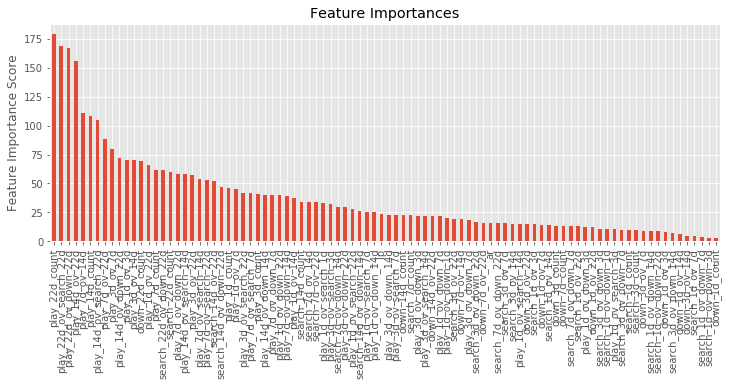

In [315]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, dtrain, dtest, selected_features)

In [316]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train, y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.75780, std: 0.00259, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.75772, std: 0.00260, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.75792, std: 0.00259, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.75858, std: 0.00254, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.75863, std: 0.00254, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.75863, std: 0.00248, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.75742, std: 0.00317, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.75772, std: 0.00293, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.75778, std: 0.00295, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.75420, std: 0.00337, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.75546, std: 0.00327, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.75584, std: 0.00318, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 5, 'min_child_weight': 3

In [317]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[2,3,4]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=5,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train, y_train)
gsearch2.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.75844, std: 0.00255, params: {'max_depth': 4, 'min_child_weight': 2},
  mean: 0.75838, std: 0.00246, params: {'max_depth': 4, 'min_child_weight': 3},
  mean: 0.75841, std: 0.00248, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: 0.75853, std: 0.00251, params: {'max_depth': 5, 'min_child_weight': 2},
  mean: 0.75863, std: 0.00254, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.75882, std: 0.00234, params: {'max_depth': 5, 'min_child_weight': 4},
  mean: 0.75833, std: 0.00278, params: {'max_depth': 6, 'min_child_weight': 2},
  mean: 0.75844, std: 0.00278, params: {'max_depth': 6, 'min_child_weight': 3},
  mean: 0.75835, std: 0.00291, params: {'max_depth': 6, 'min_child_weight': 4}],
 {'max_depth': 5, 'min_child_weight': 3},
 0.7586328572459202)

In [319]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=5,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train, y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.75863, std: 0.00254, params: {'gamma': 0.0},
  mean: 0.75865, std: 0.00248, params: {'gamma': 0.1},
  mean: 0.75864, std: 0.00261, params: {'gamma': 0.2},
  mean: 0.75858, std: 0.00259, params: {'gamma': 0.3},
  mean: 0.75865, std: 0.00245, params: {'gamma': 0.4}],
 {'gamma': 0.4},
 0.7586497661543087)

In [320]:
param_test3b = {
 'gamma':[i/10.0 for i in range(4,9)]
}
gsearch3b = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=5,
 min_child_weight=3, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3b.fit(X_train, y_train)
gsearch3b.grid_scores_, gsearch3b.best_params_, gsearch3b.best_score_

([mean: 0.75865, std: 0.00245, params: {'gamma': 0.4},
  mean: 0.75865, std: 0.00255, params: {'gamma': 0.5},
  mean: 0.75867, std: 0.00251, params: {'gamma': 0.6},
  mean: 0.75867, std: 0.00259, params: {'gamma': 0.7},
  mean: 0.75863, std: 0.00260, params: {'gamma': 0.8}],
 {'gamma': 0.7},
 0.7586658491607057)

[0]	train-auc:0.755719+0.00073697	test-auc:0.753996+0.00146898
[1]	train-auc:0.756944+0.000651394	test-auc:0.755008+0.00178862
[2]	train-auc:0.757718+0.000503099	test-auc:0.755751+0.00187074
[3]	train-auc:0.758066+0.000519256	test-auc:0.756026+0.00183973
[4]	train-auc:0.758359+0.000523219	test-auc:0.756256+0.00182011
[5]	train-auc:0.758515+0.000495617	test-auc:0.756349+0.00175613
[6]	train-auc:0.758703+0.000544913	test-auc:0.756357+0.00177081
[7]	train-auc:0.758806+0.000528865	test-auc:0.756345+0.00176541
[8]	train-auc:0.759016+0.000537882	test-auc:0.756611+0.00176456
[9]	train-auc:0.759264+0.000535508	test-auc:0.756731+0.00171649
[10]	train-auc:0.759391+0.000573125	test-auc:0.756815+0.00177486
[11]	train-auc:0.759685+0.000494908	test-auc:0.756957+0.00179337
[12]	train-auc:0.759855+0.000468893	test-auc:0.757003+0.00175862
[13]	train-auc:0.759996+0.000463802	test-auc:0.757101+0.00180596
[14]	train-auc:0.760086+0.000447524	test-auc:0.757104+0.00182914
[15]	train-auc:0.76026+0.000452517	t

[127]	train-auc:0.768276+0.000286454	test-auc:0.758846+0.00182762
[128]	train-auc:0.768342+0.00029024	test-auc:0.75885+0.00186363
[129]	train-auc:0.768377+0.000277955	test-auc:0.75884+0.00186516
[130]	train-auc:0.768418+0.00028767	test-auc:0.758848+0.00185157
[131]	train-auc:0.768498+0.000284872	test-auc:0.75884+0.00185376
[132]	train-auc:0.768538+0.000296297	test-auc:0.758835+0.00185529
[133]	train-auc:0.768588+0.000286578	test-auc:0.758833+0.0018557
[134]	train-auc:0.768646+0.000258686	test-auc:0.758825+0.00184693
[135]	train-auc:0.768678+0.000260387	test-auc:0.758807+0.00184241
[136]	train-auc:0.768728+0.000249887	test-auc:0.758798+0.0018428
[137]	train-auc:0.768778+0.000220539	test-auc:0.758804+0.00181445
[138]	train-auc:0.768828+0.000250717	test-auc:0.758806+0.00181665
[139]	train-auc:0.76887+0.000250953	test-auc:0.758804+0.00182575
[140]	train-auc:0.768907+0.000257055	test-auc:0.758799+0.00182845
[141]	train-auc:0.768969+0.00027628	test-auc:0.758793+0.00184118
[142]	train-auc:0.7

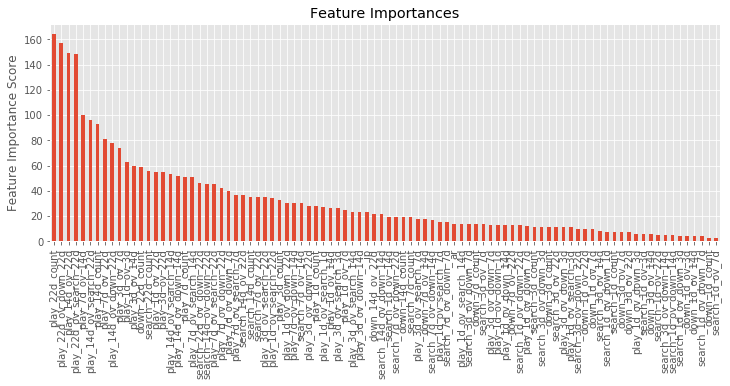

In [321]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=3,
 gamma=0.7,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, dtrain, dtest, selected_features)

In [322]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=171, max_depth=5,
 min_child_weight=3, gamma=0.7, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train, y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.75842, std: 0.00215, params: {'subsample': 0.6, 'colsample_bytree': 0.6},
  mean: 0.75862, std: 0.00238, params: {'subsample': 0.7, 'colsample_bytree': 0.6},
  mean: 0.75863, std: 0.00260, params: {'subsample': 0.8, 'colsample_bytree': 0.6},
  mean: 0.75868, std: 0.00258, params: {'subsample': 0.9, 'colsample_bytree': 0.6},
  mean: 0.75832, std: 0.00246, params: {'subsample': 0.6, 'colsample_bytree': 0.7},
  mean: 0.75882, std: 0.00249, params: {'subsample': 0.7, 'colsample_bytree': 0.7},
  mean: 0.75865, std: 0.00262, params: {'subsample': 0.8, 'colsample_bytree': 0.7},
  mean: 0.75868, std: 0.00242, params: {'subsample': 0.9, 'colsample_bytree': 0.7},
  mean: 0.75847, std: 0.00243, params: {'subsample': 0.6, 'colsample_bytree': 0.8},
  mean: 0.75870, std: 0.00232, params: {'subsample': 0.7, 'colsample_bytree': 0.8},
  mean: 0.75867, std: 0.00253, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.75849, std: 0.00237, params: {'subsample': 0.9, 'colsample_bytree'

In [323]:
param_test5 = {
 'subsample':[i/100.0 for i in range(65,80,5)],
 'colsample_bytree':[i/100.0 for i in range(65,80,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=171, max_depth=5,
 min_child_weight=3, gamma=0.7, subsample=0.7, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train, y_train)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.75872, std: 0.00239, params: {'subsample': 0.65, 'colsample_bytree': 0.65},
  mean: 0.75863, std: 0.00230, params: {'subsample': 0.7, 'colsample_bytree': 0.65},
  mean: 0.75879, std: 0.00256, params: {'subsample': 0.75, 'colsample_bytree': 0.65},
  mean: 0.75857, std: 0.00250, params: {'subsample': 0.65, 'colsample_bytree': 0.7},
  mean: 0.75882, std: 0.00249, params: {'subsample': 0.7, 'colsample_bytree': 0.7},
  mean: 0.75863, std: 0.00258, params: {'subsample': 0.75, 'colsample_bytree': 0.7},
  mean: 0.75851, std: 0.00245, params: {'subsample': 0.65, 'colsample_bytree': 0.75},
  mean: 0.75859, std: 0.00234, params: {'subsample': 0.7, 'colsample_bytree': 0.75},
  mean: 0.75857, std: 0.00255, params: {'subsample': 0.75, 'colsample_bytree': 0.75}],
 {'colsample_bytree': 0.7, 'subsample': 0.7},
 0.758824198716599)

In [324]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=171, max_depth=5,
 min_child_weight=3, gamma=0.7, subsample=0.7, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(X_train, y_train)
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.75882, std: 0.00249, params: {'reg_alpha': 1e-05},
  mean: 0.75869, std: 0.00245, params: {'reg_alpha': 0.01},
  mean: 0.75882, std: 0.00247, params: {'reg_alpha': 0.1},
  mean: 0.75898, std: 0.00238, params: {'reg_alpha': 1},
  mean: 0.75813, std: 0.00225, params: {'reg_alpha': 100}],
 {'reg_alpha': 1},
 0.7589845722195246)

In [325]:
param_test7 = {
 'reg_alpha':[1.5, 1.05, 1, 0.95, 0.5]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=171, max_depth=5,
 min_child_weight=3, gamma=0.7, subsample=0.7, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(X_train, y_train)
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

([mean: 0.75868, std: 0.00259, params: {'reg_alpha': 1.5},
  mean: 0.75877, std: 0.00249, params: {'reg_alpha': 1.05},
  mean: 0.75898, std: 0.00238, params: {'reg_alpha': 1},
  mean: 0.75868, std: 0.00245, params: {'reg_alpha': 0.95},
  mean: 0.75881, std: 0.00246, params: {'reg_alpha': 0.5}],
 {'reg_alpha': 1},
 0.7589845722195246)

[0]	train-auc:0.754855+0.000568189	test-auc:0.75321+0.00158788
[1]	train-auc:0.756815+0.000499166	test-auc:0.754612+0.00183611
[2]	train-auc:0.757589+0.000250511	test-auc:0.755392+0.00193412
[3]	train-auc:0.757911+0.000306407	test-auc:0.755906+0.0018038
[4]	train-auc:0.758207+0.000517248	test-auc:0.755937+0.00158938
[5]	train-auc:0.758442+0.000521554	test-auc:0.756135+0.00158126
[6]	train-auc:0.758608+0.000532271	test-auc:0.756246+0.00169474
[7]	train-auc:0.758716+0.000532318	test-auc:0.756353+0.0017402
[8]	train-auc:0.758914+0.000502901	test-auc:0.756433+0.00181368
[9]	train-auc:0.759037+0.000448544	test-auc:0.756477+0.0017926
[10]	train-auc:0.759193+0.000502954	test-auc:0.75653+0.00183367
[11]	train-auc:0.75944+0.000504421	test-auc:0.756705+0.00182124
[12]	train-auc:0.759605+0.000520458	test-auc:0.756734+0.00180226
[13]	train-auc:0.75976+0.000493772	test-auc:0.756884+0.00186412
[14]	train-auc:0.759884+0.000498664	test-auc:0.756914+0.00186851
[15]	train-auc:0.760057+0.000495687	test-a

[127]	train-auc:0.76828+0.000494951	test-auc:0.758734+0.00205904
[128]	train-auc:0.768349+0.00051924	test-auc:0.758718+0.00205265
[129]	train-auc:0.768379+0.000522436	test-auc:0.758717+0.00205435
[130]	train-auc:0.768439+0.000510931	test-auc:0.758704+0.00206972
[131]	train-auc:0.768494+0.000519023	test-auc:0.758711+0.00207656
[132]	train-auc:0.768544+0.000513857	test-auc:0.758726+0.00211659
[133]	train-auc:0.768596+0.000502185	test-auc:0.758712+0.00211367
[134]	train-auc:0.76865+0.000483339	test-auc:0.758723+0.00214826
[135]	train-auc:0.768679+0.000488206	test-auc:0.758727+0.00215101
[136]	train-auc:0.768756+0.000469403	test-auc:0.758705+0.00218163
[137]	train-auc:0.768824+0.000484479	test-auc:0.758695+0.00218345
[138]	train-auc:0.768877+0.000503207	test-auc:0.758686+0.00218662
[139]	train-auc:0.768927+0.0004951	test-auc:0.758701+0.00217805
[140]	train-auc:0.768966+0.000496151	test-auc:0.758698+0.00218022
[141]	train-auc:0.769008+0.000504859	test-auc:0.758687+0.00217438
[142]	train-auc

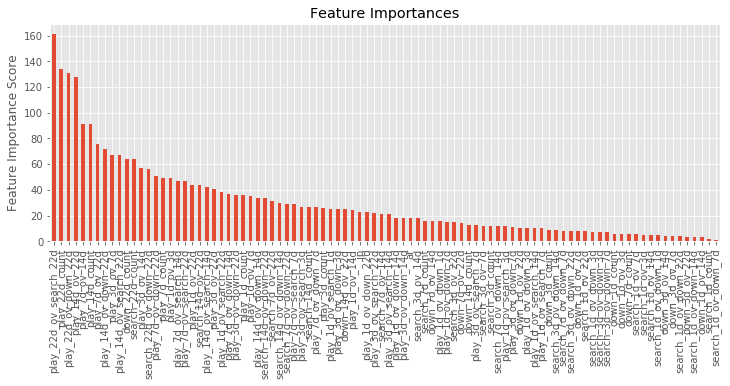

In [326]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=3,
 gamma=0.7,
 subsample=0.7,
 colsample_bytree=0.7,
 reg_alpha=1,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, dtrain, dtest, selected_features)


[0]	train-auc:0.754855+0.000568189	test-auc:0.75321+0.00158788
[1]	train-auc:0.756836+0.000357703	test-auc:0.754799+0.00179534
[2]	train-auc:0.757245+0.000343136	test-auc:0.755112+0.00173349
[3]	train-auc:0.757479+0.000298298	test-auc:0.755768+0.00183327
[4]	train-auc:0.757777+0.000506465	test-auc:0.755931+0.00169187
[5]	train-auc:0.757834+0.000508267	test-auc:0.755973+0.00174586
[6]	train-auc:0.757913+0.000490771	test-auc:0.75606+0.00172936
[7]	train-auc:0.757988+0.000438121	test-auc:0.756068+0.00169295
[8]	train-auc:0.758036+0.000425293	test-auc:0.756114+0.00175869
[9]	train-auc:0.758101+0.000458416	test-auc:0.756169+0.00172753
[10]	train-auc:0.758182+0.0004644	test-auc:0.75616+0.00167087
[11]	train-auc:0.758218+0.00045896	test-auc:0.756259+0.00162246
[12]	train-auc:0.758254+0.000460321	test-auc:0.756353+0.00167302
[13]	train-auc:0.758308+0.000448581	test-auc:0.756304+0.00167887
[14]	train-auc:0.758336+0.000450796	test-auc:0.756338+0.0016995
[15]	train-auc:0.758344+0.000454244	test-a

[127]	train-auc:0.760111+0.000455041	test-auc:0.757229+0.00178909
[128]	train-auc:0.760118+0.000463879	test-auc:0.757254+0.00180699
[129]	train-auc:0.760129+0.000460703	test-auc:0.757253+0.00180871
[130]	train-auc:0.760146+0.000475128	test-auc:0.757251+0.00181179
[131]	train-auc:0.760159+0.000473588	test-auc:0.757255+0.00181136
[132]	train-auc:0.760171+0.000475662	test-auc:0.757257+0.00181793
[133]	train-auc:0.760203+0.000467573	test-auc:0.75724+0.00180678
[134]	train-auc:0.760211+0.000466397	test-auc:0.757246+0.00179935
[135]	train-auc:0.760224+0.000467873	test-auc:0.757254+0.00179109
[136]	train-auc:0.760241+0.000466797	test-auc:0.757257+0.00179284
[137]	train-auc:0.76025+0.000473189	test-auc:0.757253+0.00180145
[138]	train-auc:0.76026+0.000469688	test-auc:0.757252+0.00179752
[139]	train-auc:0.760274+0.000467314	test-auc:0.757257+0.00178963
[140]	train-auc:0.760286+0.000463395	test-auc:0.757266+0.00179805
[141]	train-auc:0.760301+0.00045934	test-auc:0.757266+0.00179843
[142]	train-au

[252]	train-auc:0.761646+0.000458116	test-auc:0.757897+0.00182672
[253]	train-auc:0.761655+0.000460265	test-auc:0.7579+0.00182631
[254]	train-auc:0.761668+0.000462326	test-auc:0.757906+0.00182487
[255]	train-auc:0.761676+0.000459768	test-auc:0.757914+0.00182703
[256]	train-auc:0.761694+0.000460859	test-auc:0.757915+0.00183182
[257]	train-auc:0.761708+0.000460432	test-auc:0.757918+0.00182891
[258]	train-auc:0.761723+0.000463487	test-auc:0.757929+0.00182513
[259]	train-auc:0.761738+0.000461566	test-auc:0.757952+0.00180255
[260]	train-auc:0.761749+0.000461441	test-auc:0.757956+0.00180464
[261]	train-auc:0.761763+0.000459794	test-auc:0.757971+0.00180816
[262]	train-auc:0.76177+0.000459115	test-auc:0.757972+0.00180731
[263]	train-auc:0.761781+0.000457696	test-auc:0.75798+0.00180453
[264]	train-auc:0.761791+0.000459908	test-auc:0.75798+0.00180377
[265]	train-auc:0.761802+0.000460697	test-auc:0.75799+0.00180615
[266]	train-auc:0.761814+0.000461942	test-auc:0.757998+0.0018032
[267]	train-auc:0

[377]	train-auc:0.763005+0.000416142	test-auc:0.758486+0.00184503
[378]	train-auc:0.763012+0.000415133	test-auc:0.758489+0.00184536
[379]	train-auc:0.763021+0.000417014	test-auc:0.758492+0.00184128
[380]	train-auc:0.763027+0.000417947	test-auc:0.758492+0.00184207
[381]	train-auc:0.763036+0.000419397	test-auc:0.758492+0.0018419
[382]	train-auc:0.763045+0.00042076	test-auc:0.758499+0.00184226
[383]	train-auc:0.763053+0.000418363	test-auc:0.758502+0.00184361
[384]	train-auc:0.763065+0.000421128	test-auc:0.758509+0.00184241
[385]	train-auc:0.763072+0.000420757	test-auc:0.758514+0.00184215
[386]	train-auc:0.763085+0.000417768	test-auc:0.758519+0.00184483
[387]	train-auc:0.763093+0.000418674	test-auc:0.758519+0.00184485
[388]	train-auc:0.763102+0.000420914	test-auc:0.758522+0.00184326
[389]	train-auc:0.763112+0.000420704	test-auc:0.758526+0.00184363
[390]	train-auc:0.763122+0.000420548	test-auc:0.758531+0.00184044
[391]	train-auc:0.76313+0.000423268	test-auc:0.758534+0.00183821
[392]	train-a

[502]	train-auc:0.764068+0.000409826	test-auc:0.75882+0.00178753
[503]	train-auc:0.764072+0.000408241	test-auc:0.75882+0.00178759
[504]	train-auc:0.764083+0.000404348	test-auc:0.758823+0.00178891
[505]	train-auc:0.764089+0.000407449	test-auc:0.758822+0.00178958
[506]	train-auc:0.764102+0.000407477	test-auc:0.758824+0.00179111
[507]	train-auc:0.764112+0.00040719	test-auc:0.758826+0.00179338
[508]	train-auc:0.764118+0.000405357	test-auc:0.758828+0.00179466
[509]	train-auc:0.764126+0.000405854	test-auc:0.758827+0.00179074
[510]	train-auc:0.764133+0.000408024	test-auc:0.758827+0.00178777
[511]	train-auc:0.764139+0.00040989	test-auc:0.758828+0.00178563
[512]	train-auc:0.764148+0.000407235	test-auc:0.758829+0.00178483
[513]	train-auc:0.764155+0.000403995	test-auc:0.75883+0.00178429
[514]	train-auc:0.76417+0.000403238	test-auc:0.758833+0.00178729
[515]	train-auc:0.764177+0.00040321	test-auc:0.758833+0.00178728
[516]	train-auc:0.764184+0.00040036	test-auc:0.758835+0.00178736
[517]	train-auc:0.

[627]	train-auc:0.764978+0.000364802	test-auc:0.758936+0.00178462
[628]	train-auc:0.764982+0.000363372	test-auc:0.758936+0.0017858
[629]	train-auc:0.764991+0.000363485	test-auc:0.758937+0.00178574
[630]	train-auc:0.764996+0.000363891	test-auc:0.758938+0.0017838
[631]	train-auc:0.765005+0.000359639	test-auc:0.758943+0.00178645
[632]	train-auc:0.765012+0.000361384	test-auc:0.758944+0.00178833
[633]	train-auc:0.765019+0.000359065	test-auc:0.758945+0.00179046
[634]	train-auc:0.765024+0.000357943	test-auc:0.758945+0.00178775
[635]	train-auc:0.765031+0.000358698	test-auc:0.758949+0.00178833
[636]	train-auc:0.765037+0.000357402	test-auc:0.758949+0.00178744
[637]	train-auc:0.765041+0.000358103	test-auc:0.758948+0.00178759
[638]	train-auc:0.76505+0.000365508	test-auc:0.758951+0.00178437
[639]	train-auc:0.765057+0.000364281	test-auc:0.758953+0.00178356
[640]	train-auc:0.76506+0.000363691	test-auc:0.758953+0.00178387
[641]	train-auc:0.765066+0.000362675	test-auc:0.758953+0.00178505
[642]	train-au

[753]	train-auc:0.765833+0.000330245	test-auc:0.759041+0.00177645
[754]	train-auc:0.765841+0.000330652	test-auc:0.75904+0.00177672
[755]	train-auc:0.765846+0.000330959	test-auc:0.759039+0.00177607
[756]	train-auc:0.765854+0.000330569	test-auc:0.759042+0.00177465
[757]	train-auc:0.765863+0.000332735	test-auc:0.759044+0.0017737
[758]	train-auc:0.765868+0.000331829	test-auc:0.75904+0.00177045
[759]	train-auc:0.765873+0.000330908	test-auc:0.75904+0.00177052
[760]	train-auc:0.765877+0.000331443	test-auc:0.759042+0.00176928
[761]	train-auc:0.765884+0.000331542	test-auc:0.759041+0.00176897
[762]	train-auc:0.765889+0.000332209	test-auc:0.759043+0.00176855
[763]	train-auc:0.765897+0.000330909	test-auc:0.759042+0.00176703
[764]	train-auc:0.7659+0.000329556	test-auc:0.759043+0.00176755
[765]	train-auc:0.765907+0.000330272	test-auc:0.759046+0.00176507
[766]	train-auc:0.765912+0.000328195	test-auc:0.759048+0.00176609
[767]	train-auc:0.765918+0.000327329	test-auc:0.759048+0.00176654
[768]	train-auc:

[878]	train-auc:0.766585+0.000329086	test-auc:0.759078+0.00175364
[879]	train-auc:0.76659+0.00033002	test-auc:0.759078+0.00175435
[880]	train-auc:0.766591+0.000328398	test-auc:0.759097+0.00174158
[881]	train-auc:0.766598+0.000325435	test-auc:0.759094+0.00173972
[882]	train-auc:0.766604+0.000326548	test-auc:0.759096+0.00173957
[883]	train-auc:0.766609+0.000327921	test-auc:0.759096+0.00174029
[884]	train-auc:0.766617+0.000330488	test-auc:0.759099+0.0017399
[885]	train-auc:0.766624+0.000330988	test-auc:0.759099+0.00174043
[886]	train-auc:0.766631+0.000332586	test-auc:0.759098+0.00173709
[887]	train-auc:0.766635+0.000333232	test-auc:0.759098+0.00173747
[888]	train-auc:0.766643+0.000334729	test-auc:0.759097+0.00173715
[889]	train-auc:0.766653+0.000333246	test-auc:0.759099+0.00173701
[890]	train-auc:0.766658+0.000334027	test-auc:0.7591+0.00173753
[891]	train-auc:0.766665+0.000332064	test-auc:0.759102+0.00173797
[892]	train-auc:0.766673+0.000328398	test-auc:0.759105+0.00173924
[893]	train-auc

[1003]	train-auc:0.767301+0.000326077	test-auc:0.759147+0.00173784
[1004]	train-auc:0.767307+0.000322406	test-auc:0.759149+0.00174113
[1005]	train-auc:0.767312+0.00032111	test-auc:0.759148+0.00174046
[1006]	train-auc:0.767316+0.000322405	test-auc:0.759147+0.00174028
[1007]	train-auc:0.767322+0.000322876	test-auc:0.759146+0.0017395
[1008]	train-auc:0.767326+0.00032291	test-auc:0.759146+0.00173823
[1009]	train-auc:0.767333+0.000321572	test-auc:0.759147+0.00173887
[1010]	train-auc:0.767338+0.000325226	test-auc:0.759147+0.00174035
[1011]	train-auc:0.767347+0.000328706	test-auc:0.759145+0.00174421
[1012]	train-auc:0.767351+0.000328406	test-auc:0.759145+0.0017446
[1013]	train-auc:0.767358+0.000328915	test-auc:0.759146+0.0017435
[1014]	train-auc:0.767365+0.000328615	test-auc:0.759146+0.00174669
[1015]	train-auc:0.767371+0.000327569	test-auc:0.759145+0.00174685
[1016]	train-auc:0.767375+0.000328427	test-auc:0.759144+0.00174769
[1017]	train-auc:0.767383+0.000327735	test-auc:0.759144+0.00174835


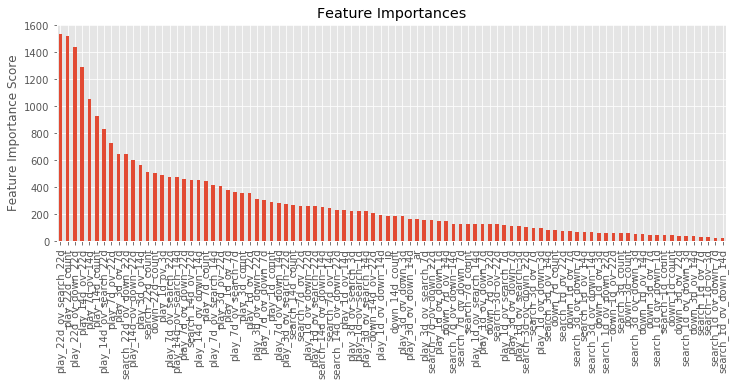

In [327]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=5,
 min_child_weight=3,
 gamma=0.7,
 subsample=0.7,
 colsample_bytree=0.7,
 reg_alpha=1,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, dtrain, dtest, selected_features)



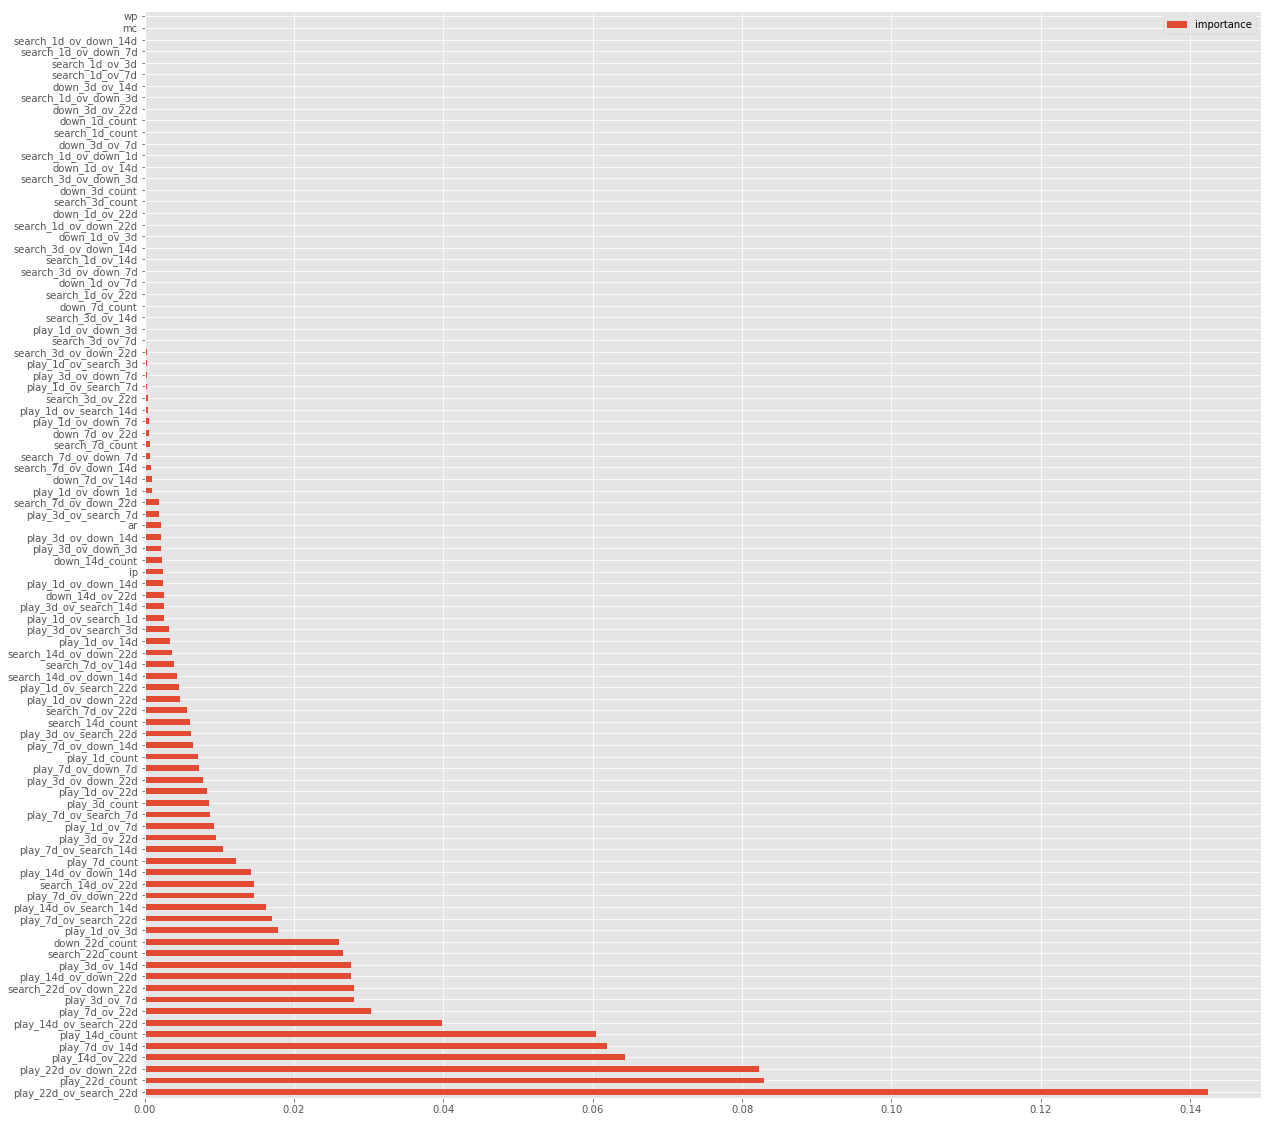

In [376]:
df_imp2 = pd.DataFrame(zip(selected_features, xgb4.feature_importances_)).sort_values(by=[1], ascending=False)
df_imp2.columns = ['feature', 'importance']
ax = df_imp.plot.barh(figsize=(20, 20))
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_imp2['feature'])
plt.show()

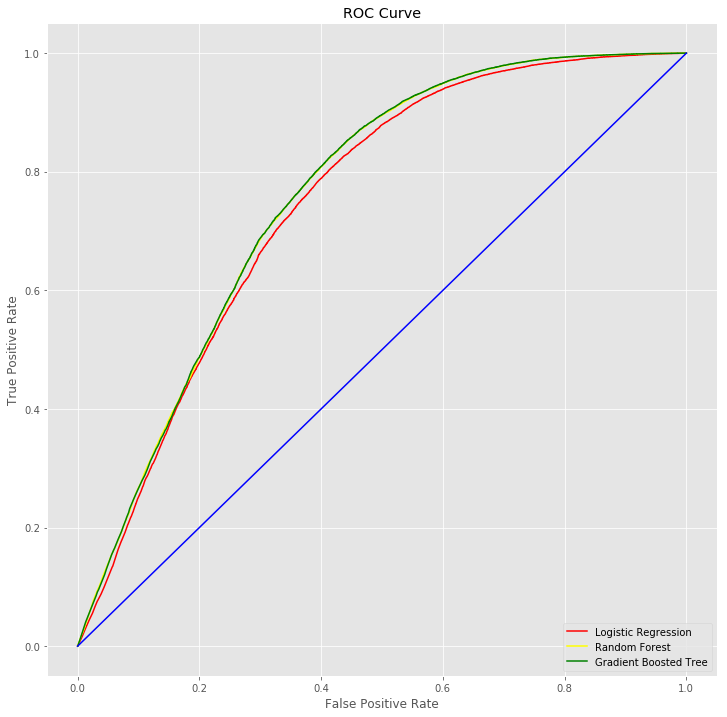

In [383]:
lr_y_test_pred_proba = lr.predict_proba(X_test)[:,1]
rf_y_test_pred_proba = rf.predict_proba(X_test)[:,1]
xgb_y_test_pred_proba = xgb4.predict_proba(dtest[selected_features])[:,1]

lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_y_test_pred_proba)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_y_test_pred_proba)
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_y_test_pred_proba)



# plot TPR against FPR
lr_plot = plt.plot(lr_fpr, lr_tpr, color='red')
rf_plot = plt.plot(rf_fpr, rf_tpr, color='yellow')
gbt_plot = plt.plot(xgb_fpr, xgb_tpr, color='green')
plt.legend(['Logistic Regression', 'Random Forest','Gradient Boosted Tree'],loc='lower right')

# plot 45 degree line
xx = np.linspace(0, 1.0, 20)
plt.plot(xx, xx, color='blue')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

plt.show()